In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

global graphCount
graphCount = 0
# for each object
# Read an object's file
# Seperate Data Pts by Filter
# For each filter:
# init output array (filter_output_array_<color>) for this filter
# Sort ALL data pts by time (least to greatest)
# For each batch of n(19) points
# Pick first n) pts find Time Median.
# Sort n pts by mag of the specific filter
# Record Time and Mag Median into Tuple/Dictionary and append this to filter_output_array_<color>
# Here we will have filter_output_array_red, filter_output_array_infra ...






In [2]:
def is_space(e):
    # This function removes the spaces in each line in the objectFile array.
    return e != ''


def read_one_object(filepath):
    
    # This function reads data file for a specific object returns the data for the specfied filters.

    print(filepath)
    objectFile = np.loadtxt(filepath, skiprows=14, delimiter='\n', unpack=1, dtype=str)
    # Here we get all the data from a single file. The delimeter gives the criteria of how the data is seperated in the array.

    uOutput = []
    gOutput = []
    rOutput = []
    iOutput = []
    i2Output = []
    zOutput = []
    # Initialized lists where we put the MDJ and Magnitude.

    for line in objectFile:
        #         print("Line :", line)
        x = line.split(" ")
        #         print(x)
        x = list(filter(is_space, x))
        # print(x[0], x[1], x[8])
        # Using split and filter, we remove all the spaces in a single line so there are no indexs where there are spaces.

        data = (float(x[0]), float(x[1]))
        if (x[8] == 'U'):
            uOutput.append(data)
        elif (x[8] == 'G'):
            gOutput.append(data)
        elif (x[8] == 'R'):
            rOutput.append(data)

        elif (x[8] == 'I'):
            iOutput.append(data)

        elif (x[8] == 'I2'):
            i2Output.append(data)
        elif (x[8] == 'Z'):
            zOutput.append(data)
    return uOutput, gOutput, rOutput, iOutput, i2Output, zOutput
            # This for loop appends the data from x (each line) and appends it to the specified filter array

    

In [3]:

uOutput, gOutput, rOutput, iOutput, i2Output, zOutput  = read_one_object('full/CFHTLS-VAR-J141851.55+521221.0.mjdmag')
#All of the data above goes into these filter arrays


full/CFHTLS-VAR-J141851.55+521221.0.mjdmag


In [4]:
import os 
import glob 
os.chdir("/Users/ArjunShrivastava/School/SIP/Astronomy Notebooks/Astronomy SIP Projects/AstronomyLab/Moving Median Model /full")
my_files = glob.glob('*[0-10].mjdmag')

for i in range (5):
    print(my_files[i])


CFHTLS-VAR-J022638.92-042606.1.mjdmag
CFHTLS-VAR-J221624.67-174751.1.mjdmag
CFHTLS-VAR-J095834.99+021314.1.mjdmag
CFHTLS-VAR-J221446.05-172006.0.mjdmag
CFHTLS-VAR-J142137.51+521323.1.mjdmag


In [5]:
def key_func(t):
    return t[1]
t = [(0,4),(3,6), (1,3),(-1,4)]
u = sorted(t,key=key_func)
print(u)

[(1, 3), (0, 4), (-1, 4), (3, 6)]


In [6]:
def time_func(filterType):
    #print(t[0])
    return t[0]
#We specify to sort only the MJD's in the tuples.

u_timeMedian, g_timeMedian, r_timeMedian, i_timeMedian, i2_timeMedian, z_timeMedian = [], [], [], [], [], []
# Array of time medians and mag medians.
filterID = ""


def sorter(filterType, filterID):
    # print("x", filterID)
    # if(filterID == uOutput):
    #  filterID == "uOutput"
    #     if(filterID == gOutput):
    #
    # filterID == "gOutput"
    #     if(filterID == rOutput):
    #          filterID == "rOutput"
    #     if(filterID == iOutput):
    #          filterID == "iOutput"
    #     if(filterID == i2Output):
    #          filterID == "i2Output"
    #     if(filterID == zOutput):
    #          filterID == "zOutput"

    filterSORTED = sorted(filterType, key=time_func)
    #print(f)
    # print(filterSORTED)
    return MedMaker(filterSORTED, filterID)

# Call the sorting funtion to order the tuples in the list by time.
# print(uOutputSORTED)
# uOutputSORTED contains the list where the tuples are organized by time.


In [7]:
def mag_func(filterType): 
    print(t[0], t[1])
    return t[1]


# Sorting function to sort the tuples by magnitude in the U list.


def MedMaker(filterSORTED, filterID):
    #print("x", filterID)
    start = 0
    end = 18
    med = 9
    #print(filterID)
    while (end < len(filterSORTED)):
       
        
        # Allows us to record the median values.
        # print(med)
        # print(uOutputSORTED[med][0], med)
        timeMed = filterSORTED[med][0]
        # We put the index of the median into the sorted time array to get the median value.

        tempArray = filterSORTED[start:end + 1]
        # Temporarily, we put the the current the mangitudes 19 points of time in this run of the loop into an array.
        # The start and end keep appending to make it a moving median.
        tempArraySORTED = sorted(tempArray, key=mag_func)

        if (filterID == "uOutput"):
            # print(True)
            u_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return u_timeMedian

        if (filterID == "gOutput"):
            g_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return g_timeMedian

        if (filterID == "rOutput"):
            r_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return r_timeMedian

        if (filterID == "iOutput"):
            i_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return i_timeMedian

        if (filterID == "i2Output"):
            i2_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return i2_timeMedian

        if (filterID == "zOutput"):
            z_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return z_timeMedian

        start += 1
        med += 1
        end += 1


In [8]:
print(sorter(uOutput, "uOutput"), )
print(sorter(gOutput, "gOutput"))
print(sorter(rOutput, "rOutput"))
print(sorter(iOutput, "iOutput"))
print(sorter(i2Output, "i2Output"))
print(sorter(zOutput, "zOutput"))

timeAxisU = []
magAxisU = []

timeAxisG = []
magAxisG = []

timeAxisR = []
magAxisR = []

timeAxisI = []
magAxisI = []

timeAxisI2 = []
magAxisI2 = []

timeAxisZ = []
magAxisZ = []




(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
[(52721.5401267, 21.375), (52721.5427887, 21.264), (52721.5454527, 21.351), (52721.5481177, 21.315), (52721.5507887, 21.312), (52721.5534437, 21.275), (52721.5561127, 21.342), (52721.5587747, 21.254), (52721.5614537, 21.286), (52721.5641217, 21.354), (52721.5667837, 21.288), (52723.5689677, 21.21), (52723.5716447, 21.266), (52723.5743267, 21.169), (52723.5769917, 21.35), (52723.5796557, 21.364), (52723.5823127, 21.328), (52723.5849747, 21.359), (52723.5876397, 21.318), (52723.5903227, 21.277), (52723.5929907, 21.386), (52723.5956627, 21.336), (52723.5983277, 21.421), (52723.6009997, 21.256), (52723.6036577, 21.316), (52723.6063957, 21.159), (52723.6117237, 21.471), (52723.6143907, 21.309), (52723.6171097, 21.266), (52723.6197727, 21.157), (52723.6267117, 21.142), (5

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4) (3, 6)
(0, 4)

<Figure size 432x288 with 0 Axes>

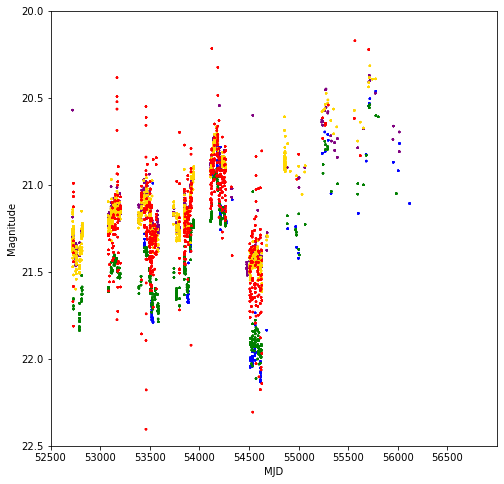

In [18]:
def InitializePlot():
    plt.clf()
    f = plt.figure(figsize=(8, 8))
    plt.xlim(52500, 56999)
    plt.ylim(22.5, 20)
    plt.xlabel('MJD')
    plt.ylabel('Magnitude')


f = InitializePlot()

for t in u_timeMedian:
    timeAxisU.append(t[0])
    magAxisU.append(t[1])
for t in g_timeMedian:
    timeAxisG.append(t[0])
    magAxisG.append(t[1])

for t in r_timeMedian:
    timeAxisR.append(t[0])
    magAxisR.append(t[1])
for t in i_timeMedian:
    timeAxisI.append(t[0])
    magAxisI.append(t[1])
for t in i2_timeMedian:
    timeAxisI2.append(t[0])
    magAxisI2.append(t[1])
for t in z_timeMedian:
    timeAxisZ.append(t[0])
    magAxisZ.append(t[1])

plt.scatter(timeAxisU, magAxisU, c='blue', edgecolors='none', s=5)
plt.scatter(timeAxisG, magAxisG, c='green', edgecolors='none', s=5)
plt.scatter(timeAxisR, magAxisR, c='purple', edgecolors='none', s=5)
plt.scatter(timeAxisI, magAxisI, c='gold', edgecolors='none', s=5)
plt.scatter(timeAxisI2, magAxisI2, c='gold', edgecolors='none', s=5)
plt.scatter(timeAxisZ, magAxisZ, c='red', edgecolors='none', s=5)


In [ ]:



figure, axis = plt.subplots(2, 2)

axis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)

axis[0,0].scatter(timeAxisG[0], magAxisG[0], c='green', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisR[0], magAxisR[0], c='red', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisI[0], magAxisI[0], c='magenta', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisI2[0], magAxisI2[0], c='brown', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisZ[0], magAxisZ[0], c='black', edgecolors='none', s=2)



axis[0,1].scatter(timeAxisU[1], magAxisU[1], c='blue', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisG[1], magAxisG[1], c='green', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisR[1], magAxisR[1], c='red', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisI[1], magAxisI[1], c='magenta', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisI2[1], magAxisI2[1], c='brown', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisZ[1], magAxisZ[1], c='black', edgecolors='none', s=2)



axis[1,1].scatter(timeAxisU[2], magAxisU[2], c='blue', edgecolors='none', s=2)
axis[1,1].scatter(timeAxisG[2], magAxisG[2], c='green', edgecolors='none', s=2)
axis[1,1].scatter(timeAxisR[2], magAxisR[2], c='red', edgecolors='none', s=2)
axis[1,1].scatter(timeAxisI[2], magAxisI[2], c='magenta', edgecolors='none', s=2)
axis[1,1].scatter(timeAxisI2[2], magAxisI2[2], c='brown', edgecolors='none', s=2)
axis[1,1].scatter(timeAxisZ[2], magAxisZ[2], c='black', edgecolors='none', s=2)



axis[1,0].scatter(timeAxisU[3], magAxisU[3], c='blue', edgecolors='none', s=2)
axis[1,0].scatter(timeAxisG[3], magAxisG[3], c='green', edgecolors='none', s=2)
axis[1,0].scatter(timeAxisR[3], magAxisR[3], c='red', edgecolors='none', s=2)
axis[1,0].scatter(timeAxisI[3], magAxisI[3], c='magenta', edgecolors='none', s=2)
axis[1,0].scatter(timeAxisI2[3], magAxisI2[3], c='brown', edgecolors='none', s=2)
axis[1,0].scatter(timeAxisZ[3], magAxisZ[3], c='black', edgecolors='none', s=2)
plt.show()

newTimeAxisU = np.array(timeAxisU[0]).reshape((-1, 1))

transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(newTimeAxisU)
timeAxisU_0 = transformer.transform(newTimeAxisU)
print(newTimeAxisU)
model = LinearRegression().fit(x_, y)





In [ ]:

for i in range(ranger):
    coList(i)

for ele in magAxisU:
    if (ele == []):
        magAxisU.remove(ele)
for ele in magAxisG:
    if (ele == []):
        magAxisG.remove(ele)
for ele in magAxisR:
    if (ele == []):
        magAxisR.remove(ele)
for ele in magAxisI:

    if (ele == []):
        magAxisI.remove(ele)
for ele in magAxisI2:
    if (ele == []):
        magAxisI2.remove(ele)
for ele in magAxisZ:
    if (ele == []):
        magAxisZ.remove(ele)
        
for ele in u_timeMedian:
    if (ele == []):
        u_timeMedian.remove(ele)
for ele in g_timeMedian:
    if (ele == []):
        g_timeMedian.remove(ele)
for ele in r_timeMedian:
    if (ele == []):
        r_timeMedian.remove(ele)
for ele in i_timeMedian:

    if (ele == []):
        i_timeMedian.remove(ele)
for ele in i2_timeMedian:
    if (ele == []):
        i2_timeMedian.remove(ele)
for ele in z_timeMedian:
    if (ele == []):
        z_timeMedian.remove(ele)

# 

In [ ]:
axis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisU[0], magAxisU[0], c='blue', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisG[0], magAxisG[0], c='green', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisR[0], magAxisR[0], c='red', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisI[0], magAxisI[0], c='magenta', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisI2[0], magAxisI2[0], c='brown', edgecolors='none', s=2)
axis[0,0].scatter(timeAxisZ[0], magAxisZ[0], c='black', edgecolors='none', s=2)



axis[0,1].scatter(timeAxisU[1], magAxisU[1], c='blue', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisG[1], magAxisG[1], c='green', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisR[1], magAxisR[1], c='red', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisI[1], magAxisI[1], c='magenta', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisI2[1], magAxisI2[1], c='brown', edgecolors='none', s=2)
axis[0,1].scatter(timeAxisZ[1], magAxisZ[1], c='black', edgecolors='none', s=2)



axis[0,2].scatter(timeAxisU[2], magAxisU[2], c='blue', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisG[2], magAxisG[2], c='green', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisR[2], magAxisR[2], c='red', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisI[2], magAxisI[2], c='magenta', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisI2[2], magAxisI2[2], c='brown', edgecolors='none', s=2)
axis[0,2].scatter(timeAxisZ[2], magAxisZ[2], c='black', edgecolors='none', s=2)



axis[0,3].scatter(timeAxisU[3], magAxisU[3], c='blue', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisG[3], magAxisG[3], c='green', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisR[3], magAxisR[3], c='red', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisI[3], magAxisI[3], c='magenta', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisI2[3], magAxisI2[3], c='brown', edgecolors='none', s=2)
axis[0,3].scatter(timeAxisZ[3], magAxisZ[3], c='black', edgecolors='none', s=2)

axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='blue', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='green', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='red', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='magenta', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='brown', edgecolors='none', s=2)
axis[1, 0].scatter(timeAxisU[4], magAxisU[4], c='black', edgecolors='none', s=2)


axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='blue', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5],c='green', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='red', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='magenta', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='brown', edgecolors='none', s=2)
axis[1, 1].scatter(timeAxisU[5], magAxisU[5], c='black', edgecolors='none', s=2)

axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='blue', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='green', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='red', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='magenta', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='brown', edgecolors='none', s=2)
axis[1, 2].scatter(timeAxisU[6], magAxisU[6], c='black', edgecolors='none', s=2)

print(timeAxisU[6], magAxisU[6])
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='blue', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='green', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='red', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='magenta', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='brown', edgecolors='none', s=2)
axis[1, 3].scatter(timeAxisU[7], magAxisU[7], c='black', edgecolors='none', s=2)


axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='blue', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='green', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='red', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='magenta', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='brown', edgecolors='none', s=2)
axis[2, 0].scatter(timeAxisU[8], magAxisU[8], c='black', edgecolors='none', s=2)

axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='blue', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='green', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='red', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='magenta', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='brown', edgecolors='none', s=2)
axis[2, 1].scatter(timeAxisU[9], magAxisU[9], c='black', edgecolors='none', s=2)

axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='blue', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='green', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='red', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='magenta', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='brown', edgecolors='none', s=2)
axis[2, 2].scatter(timeAxisU[10], magAxisU[10], c='black', edgecolors='none', s=2)

axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='blue', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='green', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='red', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='magenta', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='brown', edgecolors='none', s=2)
axis[2, 3].scatter(timeAxisU[11], magAxisU[11], c='black', edgecolors='none', s=2)

axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='blue', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='green', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='red', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='magenta', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='brown', edgecolors='none', s=2)
axis[3, 0].scatter(timeAxisG[12], magAxisG[12], c='black', edgecolors='none', s=2)

axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='blue', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='green', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='red', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='magenta', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='brown', edgecolors='none', s=2)
axis[3, 1].scatter(timeAxisU[13], magAxisU[13], c='black', edgecolors='none', s=2)

axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='blue', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='green', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='red', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='magenta', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='brown', edgecolors='none', s=2)
axis[3, 2].scatter(timeAxisU[14], magAxisU[14], c='black', edgecolors='none', s=2)

axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='blue', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='green', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='red', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='magenta', edgecolors='none', s=2)
axis[3,3].scatter(timeAxisU[15], magAxisU[15], c='brown', edgecolors='none', s=2)
axis[3, 3].scatter(timeAxisU[15], magAxisU[15], c='black', edgecolors='none', s=2)

In [ ]:
plt.ylim(23, 18)
plt.scatter(origUTime[0], origUMag[1],  c='blue', edgecolors='none', s=2 )
plt.scatter(origGTime[0], origGMag[1],  c='green', edgecolors='none', s=2 )
plt.scatter(origRTime[0], origRMag[1],  c='purple', edgecolors='none', s=2 )
plt.scatter(origITime[0], origIMag[1],  c='gold', edgecolors='none', s=2 )
plt.scatter(origUTime[0], origUMag[1],  c='gold', edgecolors='none', s=2 )
plt.scatter(origZTime[0], origZMag[1],  c='red', edgecolors='none', s=2)
plt.plot(timeAxisU[0], magAxisU[0], c='blue')
plt.plot(timeAxisG[0], magAxisG[0], c='green')
plt.plot(timeAxisR[0], magAxisR[0], c='purple')
plt.plot(timeAxisI[0], magAxisI[0], c='gold')
plt.plot(timeAxisI2[0], magAxisI2[0], c='gold')
plt.plot(timeAxisZ[0], magAxisZ[0], c='red')


In [ ]:
def RMSArray(U, G, R, I, I2, Z):
    for i in range(len(U)):
        #print(i, "llll")
        #if(len(i) < 1): print("found")
        #print(RMSCalc(i))
        if(len(RMSCalc(U[i])) < 1):
            continue
        else:
            U_RMS[i].append(RMSCalc(U[i]))
    for i in range(len(G)):
        if (len(RMSCalc(G[i])) < 1):
            continue
        else:
            G_RMS.append(RMSCalc(G[i]))
    for i in range(len(R)):
        if (len(RMSCalc(R[i])) < 1):
            continue
        else:
            R_RMS.append(RMSCalc(R[i]))
    for i in range(len(I)):
        if (len(RMSCalc(I[i])) < 1):
            continue
        else:
            I_RMS.append(RMSCalc(I[i]))
    for i in range(len(I2)):
        if (len(RMSCalc(I2[i])) < 1):
            continue
        else:
            I2_RMS.append(RMSCalc(I2[i]))
    for i in range(len(Z)):
        if (len(RMSCalc(Z[i])) < 1):
            continue
        else:
            Z_RMS.append(RMSCalc(Z[i]))


In [ ]:
def mean(U, G, R, I, I2, Z):
    for i in U:
        if (i == []):
            continue
        else:
            i = np.array(i)
            U_M.append(i)
    for i in G:

        if (i == []):
            continue
        else:
            i = np.array(i)
            G_M.append(i)
    for i in R:
        if (i == []):
            continue
        else:
            i = np.array(i)
            R_M.append(i)